In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5

true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [3]:
def init_params():
    w = torch.normal(0, 0.01, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [5]:
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [6]:
def train(lambd, penalty):
    w, b = init_params()
    net, loss = lambda X:d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 200, 0.003
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)

        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print(f'w\'s L2 norm: {torch.norm(w).item():.3f}')

w's L2 norm: 0.148


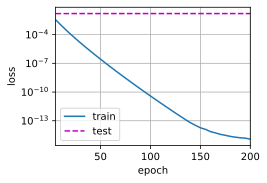

In [7]:
train(lambd=0, penalty=l2_penalty)

w's L2 norm: 0.151


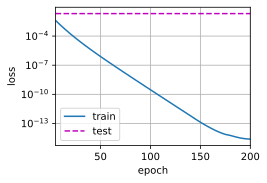

In [8]:
train(0, penalty=l1_penalty)

w's L2 norm: 0.032


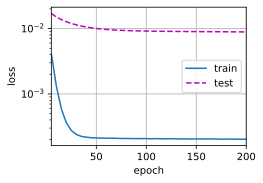

In [21]:
train(lambd=2, penalty=l2_penalty)

w's L2 norm: 0.245


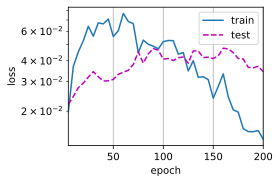

In [10]:
train(lambd=10, penalty=l1_penalty)

In [11]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss()
    num_epochs, lr = 200, 0.003
    trainer = torch.optim.SGD([{'params': net[0].weight, 
                                'weight_decay': wd},
                                {'params': net[0].bias}], lr=lr)
    
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.backward()
            trainer.step()

        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))

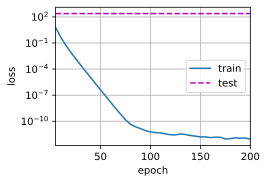

In [12]:
train_concise(wd=0)

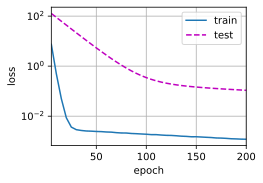

In [13]:
train_concise(wd=3)